In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Opinions_All_Cleaned.csv")
df.head(5)

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Interest in buying another policy,Reason for being interested in buying another policy,Criteria looked out for buying insurance,Reason for being uninterested in buying another policy,...,Type of policies under Prudential_motor/vehicle insurance,Type of policies under Prudential_health insurance,Type of policies under Prudential_savings insurance,Type of policies under Prudential_travel insurance,Type of policies under Prudential_investment insurance,Type of policies under Prudential_nil,Type of policies under Prudential_not sure,Type of policies under Prudential_accident insurance,Type of policies under Prudential_critical illness,Type of policies under Prudential_personal accident
0,22 to 36 years old,student,"$25,000 and below",yes,life insurance,parents,yes,for future precautions,affordability;coverage;clarity of policy,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,22 to 36 years old,student,no income,yes,not sure,parents,no,NaN,NaN,lack of information;family member(s) have alre...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21 years old and under,student,no income,yes,life insurance,parents,no,NaN,NaN,lack of information;family member(s) have alre...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,22 to 36 years old,student,no income,yes,not sure,parents,yes,for investment purposes;for future precautions,affordability;coverage;multi policy discounts;...,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21 years old and under,student,no income,yes,life insurance;motor/vehicle insurance;health ...,parents,no,NaN,NaN,family member(s) have already bought it for you,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
# Extract only the required columns & drop empty rows
feedback_df = df[["Age","Occupation","Annual Income","Improvements"]]
feedback_df = feedback_df.dropna()

situation_df = df[["Situation in which insurance will help you"]]
situation_df = situation_df.dropna()
situation_df = situation_df.drop(situation_df[situation_df["Situation in which insurance will help you"].astype(str).str.match("^\s+$")].index)

## Lemmatization

In [4]:
#lemmanisation
#using spacy
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.stem import WordNetLemmatizer

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

feedback_df['lemmatised_content'] = feedback_df['Improvements'].apply(lambda x: lemmatizer(x))
situation_df['lemmatised_content'] = situation_df["Situation in which insurance will help you"].apply(lambda x: lemmatizer(x))

feedback_df['lemmatised_content']=feedback_df['lemmatised_content'].str.replace('-PRON-', '')
situation_df['lemmatised_content']=situation_df['lemmatised_content'].str.replace('-PRON-', '')

C:\Users\65932\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\65932\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

## Tokenization

In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokenize the words 
feedback_df['tokenized_content'] = feedback_df['lemmatised_content'].apply(lambda x: tokenizer.tokenize(x))
situation_df['tokenized_content'] = situation_df['lemmatised_content'].apply(lambda x: tokenizer.tokenize(x))

## Stop words removal

In [6]:
from nltk.corpus import words
from nltk.corpus import stopwords

#remove stop words
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    custom_words_rm = ['insurance', 'policy', 'plan', 'year']
    final_words = [w for w in words if w not in custom_words_rm]
    return final_words

words = words.words()

#remove words with length less than 3 & urls
def remove_shortwords(text, words):
    words = [w for w in text if len(w)>=3]
    return words

feedback_df['remove_stopwords_content'] = feedback_df['tokenized_content'].apply(lambda x: remove_stopwords(x))
situation_df['remove_stopwords_content'] = situation_df['tokenized_content'].apply(lambda x: remove_stopwords(x))

## POS Tagging

In [7]:
import nltk
from nltk.tokenize import word_tokenize

def POS_tagging(str_list):
    removeitem = ['i','im',"nil",'la','cant','eg','get','make','cos','whereby','']
    tokens = nltk.pos_tag(str_list)
    JJ_tokens = [i[0] for i in tokens if i[1] in ['JJ','JJS','JJR'] and i[0] not in removeitem]
    noun_tokens = [i[0] for i in tokens if i[1] in ['NN','NNS','NNP','NNPS'] and i[0] not in removeitem]
    return (JJ_tokens + noun_tokens)

feedback_df['pos_tag_content']=feedback_df['remove_stopwords_content'].apply(lambda x: POS_tagging(x))
situation_df['pos_tag_content']=situation_df['remove_stopwords_content'].apply(lambda x: POS_tagging(x))

## Processed Final Content

In [8]:
def join(text):
    sentence = " ".join(text)
    return sentence
feedback_df['final_content'] = feedback_df['pos_tag_content'].apply(lambda x: join(x))
situation_df['final_content'] = situation_df['pos_tag_content'].apply(lambda x: join(x))

In [9]:
feedback_df.head()

,Age,Occupation,Annual Income,Improvements,lemmatised_content,tokenized_content,remove_stopwords_content,pos_tag_content,final_content
0,22 to 36 years old,student,"$25,000 and below",in the event of a pandemic,in the event of a pandemic,"[in, the, event, of, a, pandemic]","[event, pandemic]","[event, pandemic]",event pandemic
1,22 to 36 years old,student,no income,more advertisement to promote or tell me what ...,more advertisement to promote or tell what po...,"[more, advertisement, to, promote, or, tell, w...","[advertisement, promote, tell, suitable]","[advertisement, suitable, promote, tell]",advertisement suitable promote tell
3,22 to 36 years old,student,no income,job related insurance,job related insurance,"[job, related, insurance]","[job, related]",[job],job
4,21 years old and under,student,no income,claim easier la,claim easy la,"[claim, easy, la]","[claim, easy, la]","[easy, claim]",easy claim
6,22 to 36 years old,cleaner,"$25,000 and below",better service,well service,"[well, service]","[well, service]",[service],service


In [10]:
situation_df.head()

,Situation in which insurance will help you,lemmatised_content,tokenized_content,remove_stopwords_content,pos_tag_content,final_content
0,pandemic,pandemic,[pandemic],[pandemic],[pandemic],pandemic
1,train breakdown then i need to take other mode...,train breakdown then i need to take other mode...,"[train, breakdown, then, i, need, to, take, ot...","[train, breakdown, need, take, mode, transport...","[breakdown, mode, extra, train, transport, pay...",breakdown mode extra train transport pay fee p...
3,pandemic,pandemic,[pandemic],[pandemic],[pandemic],pandemic
5,hospitalisation,hospitalisation,[hospitalisation],[hospitalisation],[hospitalisation],hospitalisation
6,medical bills,medical bill,"[medical, bill]","[medical, bill]","[medical, bill]",medical bill


# Wordcloud

## Feedback wordcloud

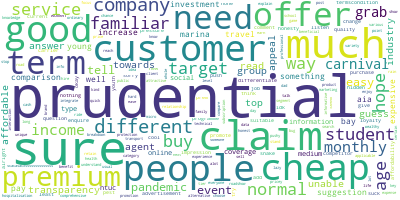

In [11]:
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(feedback_df['final_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Situation wordcloud

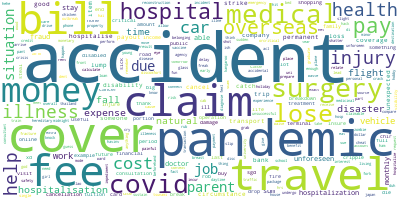

In [12]:
# Join the different processed titles together.
long_string = ','.join(list(situation_df['final_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Count Vectorizer

In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()



C:\Users\65932\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


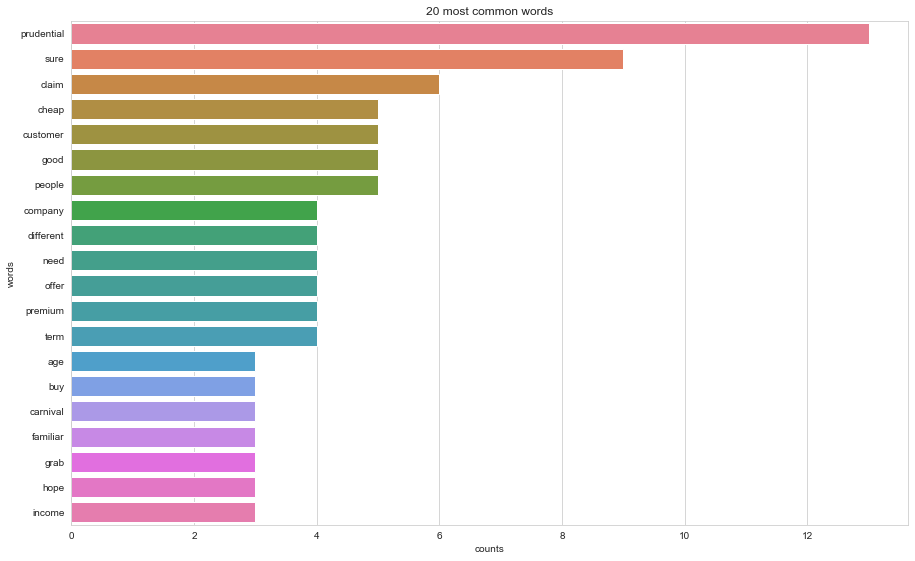

In [14]:
# Initialise the count vectorizer with the English stop words
feedback_count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

# Fit and transform the processed titles
feedback_count_data = feedback_count_vectorizer.fit_transform(feedback_df['final_content'])

# Visualise the 20 most common words
plot_20_most_common_words(feedback_count_data, feedback_count_vectorizer)

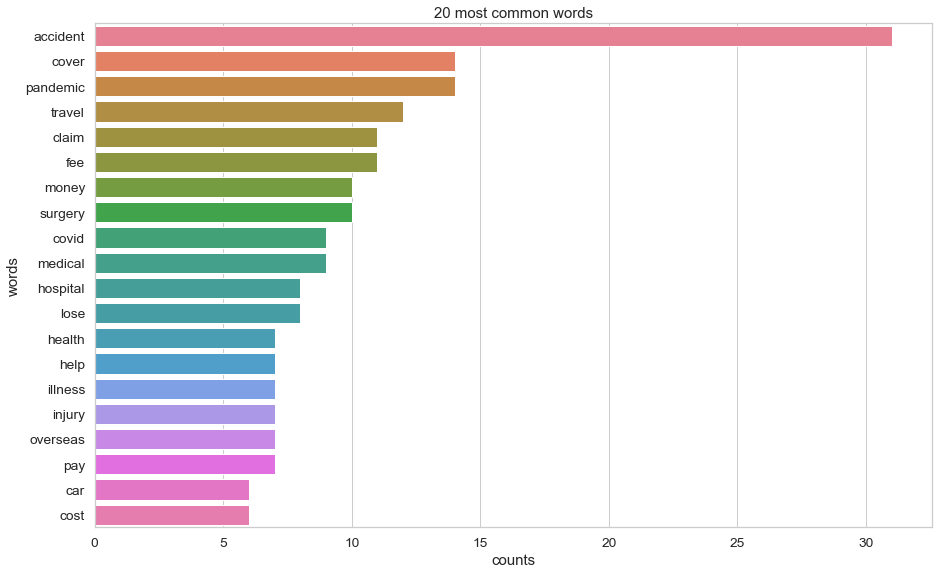

In [15]:
# Initialise the count vectorizer with the English stop words
situation_count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

# Fit and transform the processed titles
situation_count_data = situation_count_vectorizer.fit_transform(situation_df['final_content'])

# Visualise the 20 most common words
plot_20_most_common_words(situation_count_data, situation_count_vectorizer)

## LDA Model

In [16]:
# import warnings
# warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10



C:\Users\65932\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


### Feedback LDA model

In [17]:
# Create and fit the LDA model
feedback_lda = LDA(n_components=number_topics)
feedback_lda.fit(feedback_count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(feedback_lda, feedback_count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
sure prudential offer student event good expensive bay marina way

Topic #1:
prudential different claim age premium cheap term people hope company

Topic #2:
familiar sure target guess buy okay current carrier add push

Topic #3:
good need service claim monthly information company investment affordable cheap

Topic #4:
grab people normal customer ntuc young pandemic answer buy income


### Situation LDA model

In [18]:
# Create and fit the LDA model
situation_lda = LDA(n_components=number_topics)
situation_lda.fit(situation_count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(situation_lda, situation_count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
medical covid fee pandemic fall overseas lose job strike loss

Topic #1:
accident hospital illness health cover parent stay surgery cost natural

Topic #2:
accident car doctor hospitalise cost consultation sgd cripple visit operation

Topic #3:
claim travel cover injury surgery money hospitalisation help flight trip

Topic #4:
pandemic pay money lose time vehicle sum lump transport job


In [19]:
feedback_df.to_csv('Opinions_Feedback_Dashboard.csv', index= False)
situation_df.to_csv('Opinions_Situation_Dashboard.csv', index= False)